In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Market_Basket_Optimisation.csv", header=None)

In [4]:
df.shape

(7501, 20)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.fillna('', inplace=True)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
2,chutney,,,,,,,,,,,,,,,,,,,
3,turkey,avocado,,,,,,,,,,,,,,,,,,
4,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,


In [7]:
transactions = []
for i in range(len(df)):
    transaction = [str(item) for item in df.iloc[i] if item != '']
    transactions.append(transaction)

print(transactions[:5])


[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

items = [item for sublist in transactions for item in sublist]
item_counts = Counter(items)

item_counts_df = pd.DataFrame(item_counts.items(), columns=['Item', 'Count'])
item_counts_df

,Item,Count
0,shrimp,536
1,almonds,153
2,avocado,250
3,vegetables mix,193
4,green grapes,68
...,...,...
115,burger sauce,44
116,oatmeal,33
117,asparagus,1
118,cream,7


In [10]:
#import neccesary libraries
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [11]:
#convert into binary matrix format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)


In [12]:
#applying the apriori algorithm and the association rules
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules.sort_values('lift', ascending=False).head(10))


       antecedents      consequents  antecedent support  consequent support  \
4  (mineral water)      (spaghetti)            0.238368            0.174110   
5      (spaghetti)  (mineral water)            0.174110            0.238368   
1      (chocolate)  (mineral water)            0.163845            0.238368   
0  (mineral water)      (chocolate)            0.238368            0.163845   
2  (mineral water)           (eggs)            0.238368            0.179709   
3           (eggs)  (mineral water)            0.179709            0.238368   

    support  confidence      lift  leverage  conviction  zhangs_metric  
4  0.059725    0.250559  1.439085  0.018223    1.102008       0.400606  
5  0.059725    0.343032  1.439085  0.018223    1.159314       0.369437  
1  0.052660    0.321400  1.348332  0.013604    1.122357       0.308965  
0  0.052660    0.220917  1.348332  0.013604    1.073256       0.339197  
2  0.050927    0.213647  1.188845  0.008090    1.043158       0.208562  
3  0.050

In [18]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437


Support: The proportion of transactions in the dataset that contain the itemset. It measures how frequently the itemset appears in the dataset.

Confidence: The likelihood that the presence of one item leads to the presence of another item in the same transaction. It measures the strength of the rule.

Lift: This is the ratio of the observed support of the rule to the expected support if the items were independent. It indicates how much more likely the consequent (B) is to occur when the antecedent (A) occurs.

    A lift value greater than 1 indicates a positive association, meaning items A and B are more likely to be bought together.
    A lift value less than 1 indicates a negative association.
    A lift value equal to 1 indicates no association.

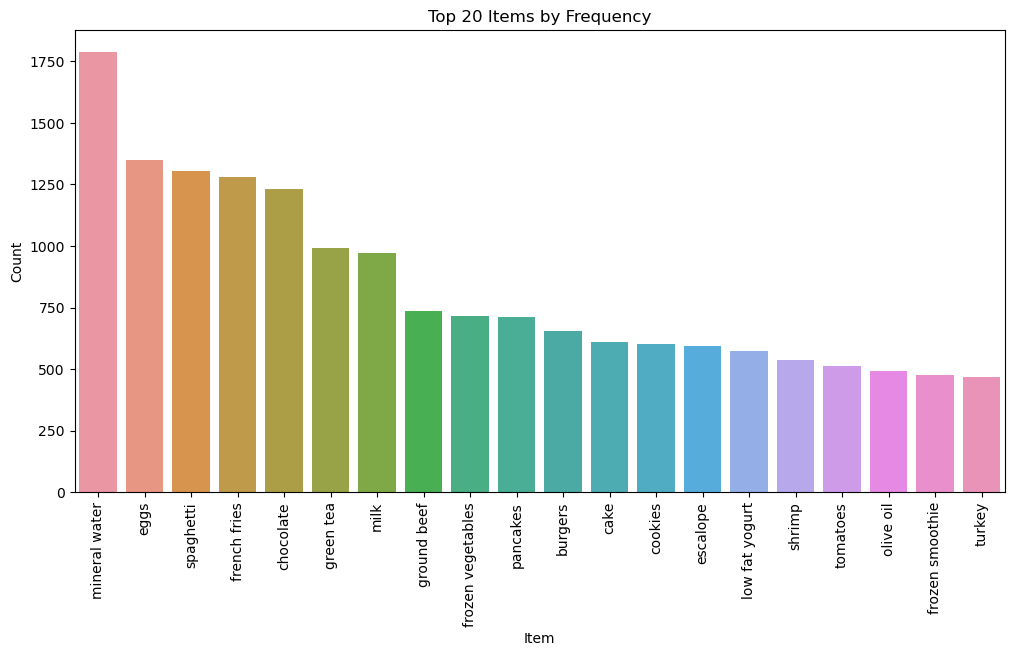

In [15]:
#product popularity
plt.figure(figsize=(12, 6))
sns.barplot(x='Item', y='Count', data=item_counts_df.sort_values('Count', ascending=False).head(20))
plt.xticks(rotation=90)
plt.title('Top 20 Items by Frequency')
plt.show()

Text(0.5, 1.0, 'Top 10 Items by Count')

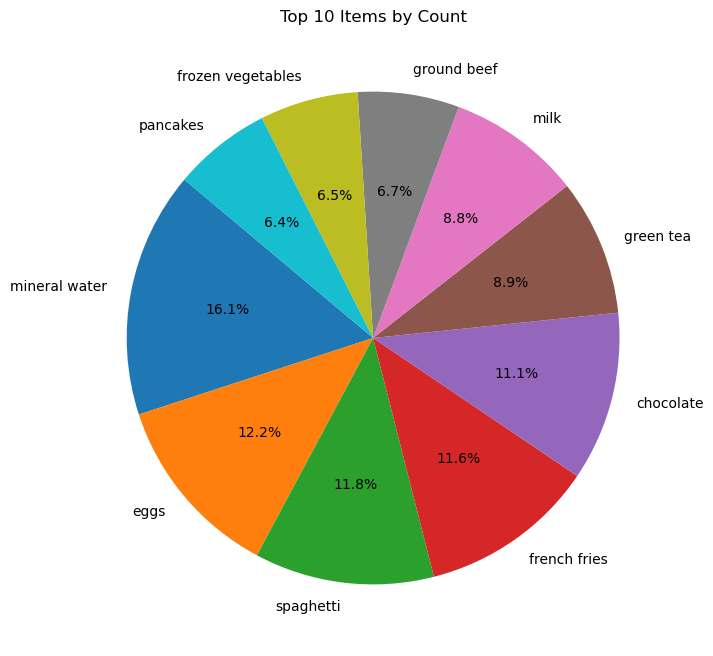

In [17]:
# Sort DataFrame by 'count' in descending order and select top 10 items
top_10_items = item_counts_df.sort_values(by='Count', ascending=False).head(10)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_items['Count'], labels=top_10_items['Item'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Items by Count')

Text(0.5, 1.0, 'Heatmap of Lift for Association Rules')

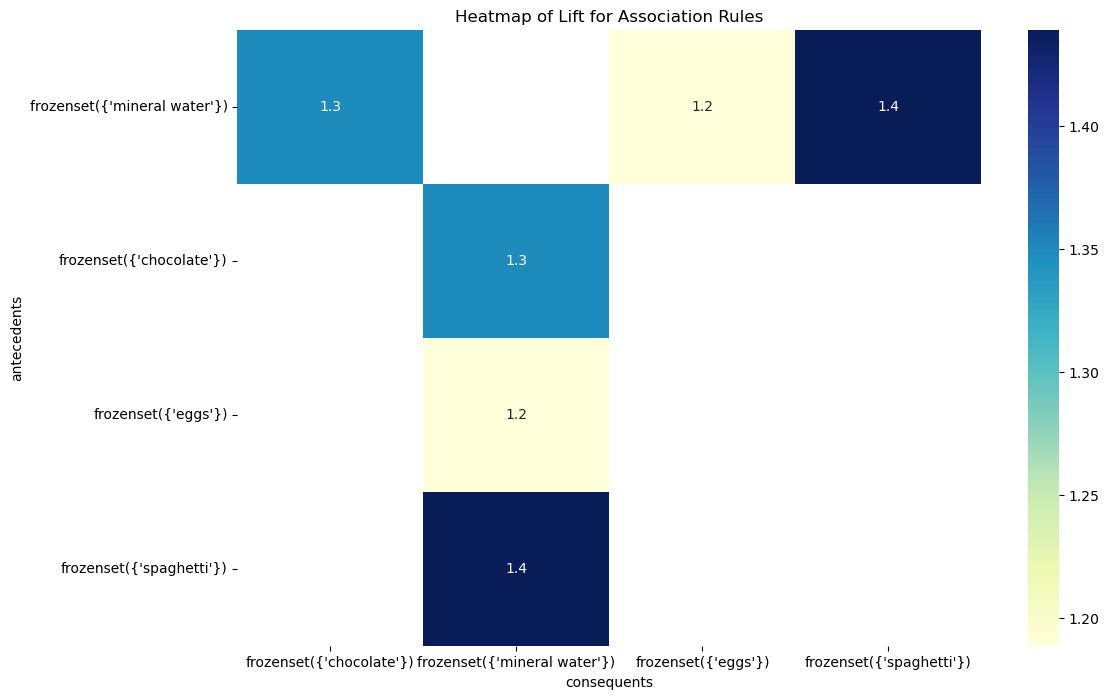

In [14]:
#heatmap
pivot_table = rules.pivot(index='antecedents', columns='consequents', values='lift')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Lift for Association Rules')


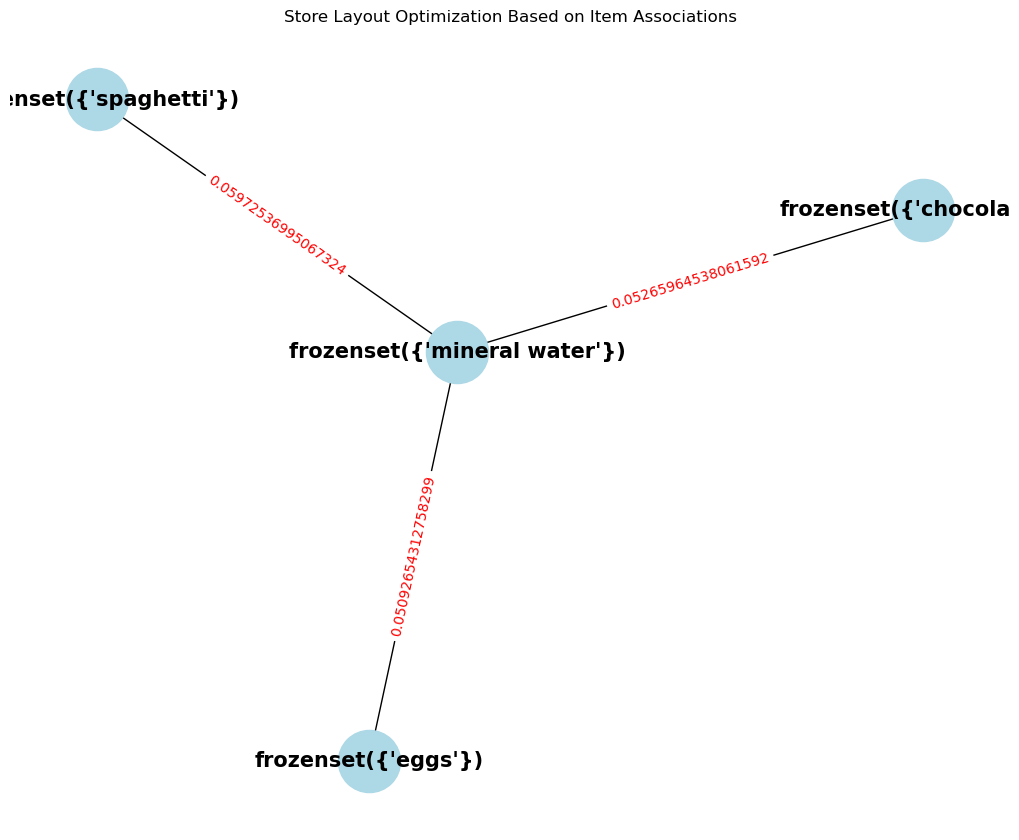

In [20]:
import networkx as nx
# Create a graph
G = nx.Graph()

# Add edges with weights
for _, row in rules.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['support'])

# Draw the network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=15, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title('Store Layout Optimization Based on Item Associations')
plt.show()

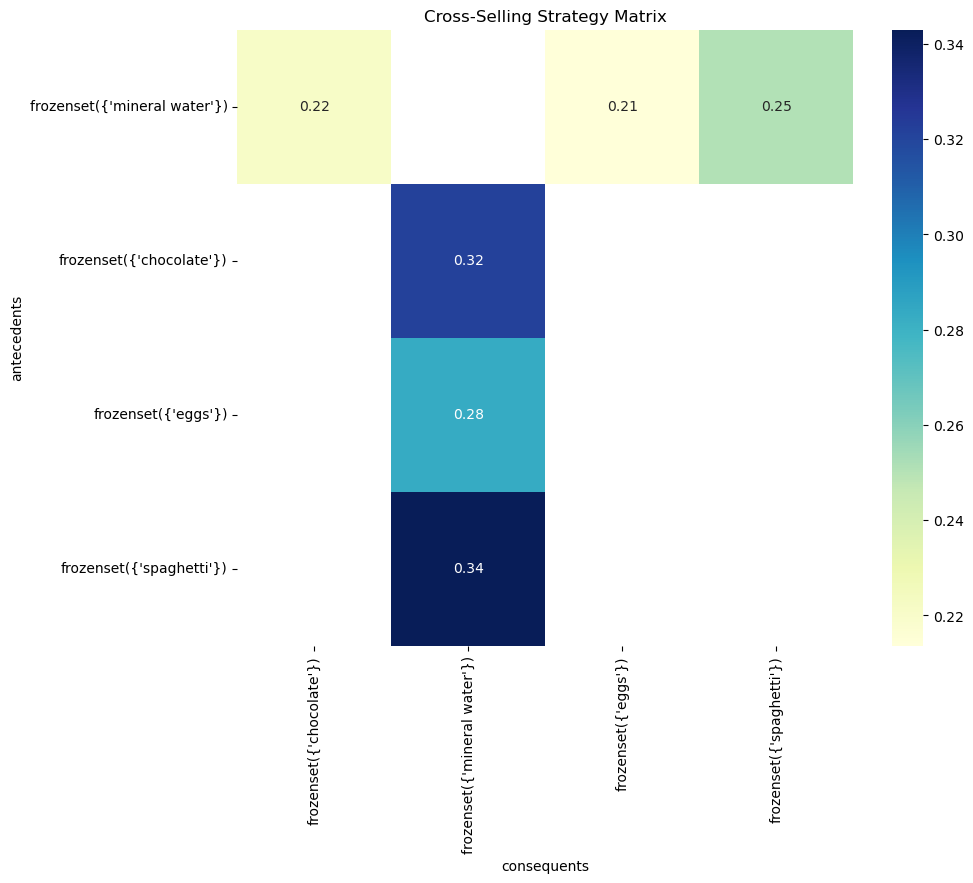

In [22]:
#cross selling matrix
# Pivot the DataFrame to create a matrix
matrix = rules.pivot(index='antecedents', columns='consequents', values='confidence')

# Plot the matrix
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='YlGnBu', cbar=True, square=True)
plt.title('Cross-Selling Strategy Matrix')
plt.show()